## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from typing import List, Any, NamedTuple
import operator
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
import re
from nltk.stem import PorterStemmer

## Functions and Class Definitions

In [3]:
#Defining a class structure
class Event(NamedTuple):
    column_name: str
    value: Any
    opt: Any

operator_mapping = {
    '==': operator.eq,
    '<': operator.lt,
    '>': operator.gt,
    '<=': operator.le,
    '>=': operator.ge
}

In [4]:
#Function for probability
def probability(df: pd.DataFrame, event: Event) -> float:
    """
    To calculate probabilty of an event
    params:
        df: data represented in form of a Dataframe
        event: the event details
    return:
        ans: probabilty of the event occuring
    """
    if event.column_name not in df.columns:
        raise Exception("column not found")
    ans = (operator_mapping[event.opt](df[event.column_name], event.value)).sum()/len(df)
    return ans

In [5]:
#function for Conditional Probability
def conditional_probability(df: pd.DataFrame, event: Event, given_event: List[Event]) -> float:
    """
    To calculate conditional probabilty of an event occuring for the given features  
    params:
        df: data represented in form of a Dataframe
        event: the event details
        given_event: list of events that have already occured
    return:
        ans: conditional probabilty of the event occuring
    """
    condition_b= True
    condition_a= operator_mapping[event.opt](df[event.column_name], event.value)
    for i in range(len(given_event)):
        condition_b= condition_b & ( operator_mapping[given_event[i].opt](df[given_event[i].column_name], given_event[i].value))
        condition_a= condition_a & ( operator_mapping[given_event[i].opt](df[given_event[i].column_name], given_event[i].value))
    return condition_a.sum()/ condition_b.sum()


### Global Definitions

In [7]:
# Dataframe of the given data
df= pd.read_excel(r'Prostate_Cancer_Data.xlsx')

# Color pallette for the diagrams
colors= sns.color_palette('pastel')[0:10]

In [13]:
df.head()

,Gender,Smoking,Prostate Volume,PSA Level,Age,Prostate Cancer
0,Male,Yes,High,High,72,Yes
1,Female,No,Medium,Low,45,No
2,Male,Yes,High,High,68,Yes
3,Male,No,Low,Medium,60,No
4,Female,No,Medium,Low,55,No


### Q1. What is the percentage of patients diagnosed with prostate cancer, P (prostate cancer = Yes)?

In [14]:
st = Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
percentage_of_prostate_cancer= probability(df, st) *100
percentage_of_prostate_cancer

64.0

In [16]:
# The percentage of people diagnosed with prostate cancer is 64%

### Q2. What is the probability that a patient who smokes will develop prostate cancer, P (Prostate Cancer = Yes | Smoking = Yes)?

In [19]:
# P(Prostate Cancer= yes | Smoking= yes) = P (B|A)* P(A)/ P(B)

condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given= Event(column_name='Smoking', value='Yes', opt = '==')
conditional_probability_Prostate_yes_smoking_yes= conditional_probability(df, condition, [given])
conditional_probability_Prostate_yes_smoking_yes

0.88

In [21]:
# The probability of person diagnosed with prostate cancer given he smokes is 0.88

### Q3. What is the probability that a non-smoker with a high PSA level has prostate cancer? P (Prostate Cancer = Yes | Smoking = No, PSA level = High)


In [24]:
condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given1= Event(column_name ='Smoking', value='No', opt = '==')
given2= Event(column_name ='PSA Level', value='High', opt = '==')
conditional_probability_Prostate_yes_smoking_yes_psa_high = conditional_probability(df, condition, [given1, given2])
conditional_probability_Prostate_yes_smoking_yes_psa_high

1.0

In [26]:
# The probability of person diagnosed with prostate cancer given he smokes and has high PSA level is 1

### Q4. What is the probability that a person with medium prostate volume and age over 60 has prostate cancer? P (Prostate Cancer = Yes | Age >60, Prostate Volume = Medium)

In [29]:
condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given1= Event(column_name='Age', value= 60, opt = '>')
given2= Event(column_name='Prostate Volume', value='Medium', opt = '==')
conditional_probability_Prostate_yes_age_60_pvolume_medium = conditional_probability(df, condition, [given1, given2])
conditional_probability_Prostate_yes_age_60_pvolume_medium

1.0

In [31]:
# The probability of person diagnosed with prostate cancer given he is above 60 and his protate volume is Medium is 1

### Q5. What is the probability that a male has prostate cancer?

In [34]:
condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given= Event(column_name='Gender', value='Male', opt = '==')
conditional_probability_Prostate_yes_gender_male = conditional_probability(df, condition, [given])
conditional_probability_Prostate_yes_gender_male

0.7037037037037037

In [36]:
# The probability of person diagnosed with prostate cancer given he is male is 0.7037037037037037

### Q6. Determine the significance of the prostate volume feature when predicting prostate cancer (Prostate cancer = Yes) as the target variable.

In [39]:
condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given= Event(column_name='Prostate Volume', value='High', opt = '==')
conditional_probability_Prostate_yes_PVolume_high= conditional_probability(df, condition, [given])
conditional_probability_Prostate_yes_PVolume_high

0.8235294117647058

In [41]:
condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given= Event(column_name='Prostate Volume', value='Medium', opt = '==')
conditional_probability_Prostate_yes_PVolume_medium= conditional_probability(df, condition, [given])
conditional_probability_Prostate_yes_PVolume_medium

0.7647058823529411

In [43]:
condition= Event(column_name='Prostate Cancer ', value='Yes', opt = '==')
given= Event(column_name='Prostate Volume', value='Low', opt = '==')
conditional_probability_Prostate_yes_PVolume_low = conditional_probability(df, condition, [given])
conditional_probability_Prostate_yes_PVolume_low

0.3125

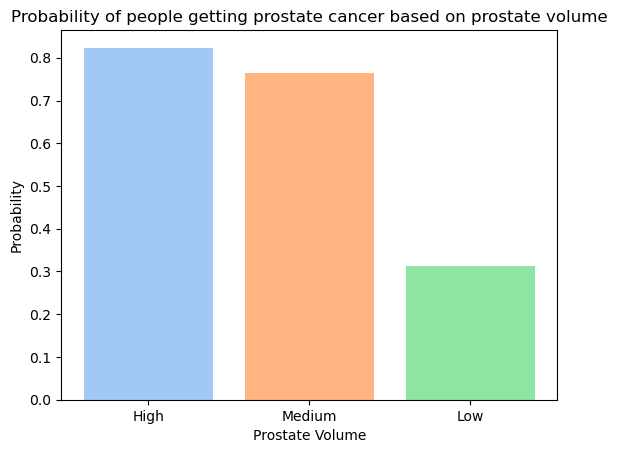

In [45]:
# Pie chart to depict the feature importance for better explanation
data= {"High": conditional_probability_Prostate_yes_PVolume_high, "Medium" : conditional_probability_Prostate_yes_PVolume_medium, 
       "Low" : conditional_probability_Prostate_yes_PVolume_low}
Protate_Volume= data.keys()
Probability= data.values()
plt.bar(Protate_Volume, Probability, color =colors)
plt.xlabel('Prostate Volume')
plt.ylabel('Probability')
plt.title('Probability of people getting prostate cancer based on prostate volume');

In [47]:
# As we can see the prostate volume being high increases the probability of prostate cancer

### Q7. What percentage of patients are diagnosed with prostate cancer, and what percentage are not? Display the results using both a pie chart and a bar chart.

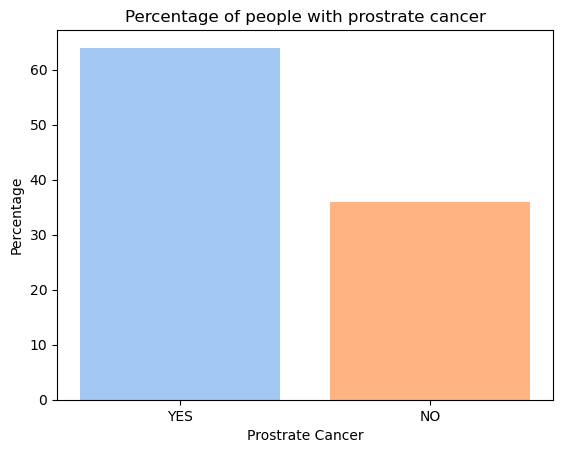

In [50]:
percentage_of_not_prostate_cancer= 100- percentage_of_prostate_cancer
percentage_of_not_prostate_cancer
data= {"YES": percentage_of_prostate_cancer, "NO" : percentage_of_not_prostate_cancer}
result= data.keys()
percentage= data.values()
plt.bar(result, percentage, color =colors)
plt.xlabel('Prostrate Cancer')
plt.ylabel('Percentage')
plt.title('Percentage of people with prostrate cancer');

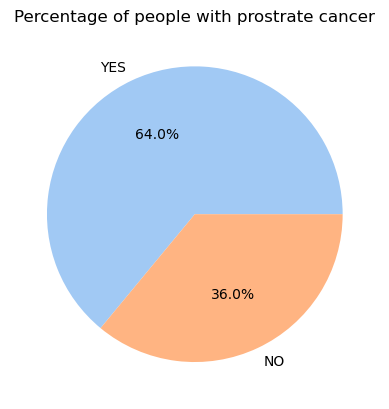

In [52]:
plt.pie(percentage, labels= result, colors= colors, autopct= '%1.1f%%')
plt.title("Percentage of people with prostrate cancer")
plt.show()

### Q8. Suppose we want to predict the prostate cancer status (Yes or No) for three new patients. The features for these patients are provided in the table below. Assume that 80% of the dataset is used for training and the remaining 20% for testing.

In [55]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Prostate Volume'] = df['Prostate Volume'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['PSA Level'] = df['PSA Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Prostate Cancer '] = df['Prostate Cancer '].map({'Yes': 1, 'No': 0})
X=df.drop('Prostate Cancer ', axis=1)
y=df.loc[:,'Prostate Cancer ']
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y, test_size=0.2, random_state=42)
model=GaussianNB()

In [57]:
model.fit(Xtrain,ytrain)

GaussianNB()

#### a. What would be the predicted prostate cancer class for these three patients when you apply Naïve Bayes?

In [60]:
new_patients = pd.DataFrame({
    'Gender': [0, 1, 1],  # Female, Male, Male
    'Smoking': [1, 0, 1],  # Yes, No, Yes
    'Prostate Volume': [2, 1, 3],  # Medium, Low, High
    'PSA Level': [3, 2, 1],  # High, Medium, Low
    'Age': [49, 64, 75]
})
predictions = model.predict(new_patients)
predictions


array([1, 0, 1])

In [62]:
# the prediction 1 referes to Protate cancer 'Yes' and 0 is 'No'. Therefore the new data would look like
#Gender	Smoking	Prostate Volume	PSA Level	Age	Prostate Cancer
#Female	Yes	    Medium	        High	    49	Yes
#Male	No	    Low	            Medium	    64	No
#Male	Yes	    High	        Low	        75	Yes

#So we can conclude patient 1 and 3 are more likely to have prostate cancer


#### b. Find accuracy, recall, and precision

In [65]:
#solution 1

ypred=model.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)

print(f'accuracy= {accuracy} \nprecision= {precision} \nrecall = {recall}')

accuracy= 0.8 
precision= 0.75 
recall = 1.0


In [67]:
#solution 2
report = classification_report(ypred, ytest)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.75      0.86         8

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10



#### c. Show confusion matrix. 

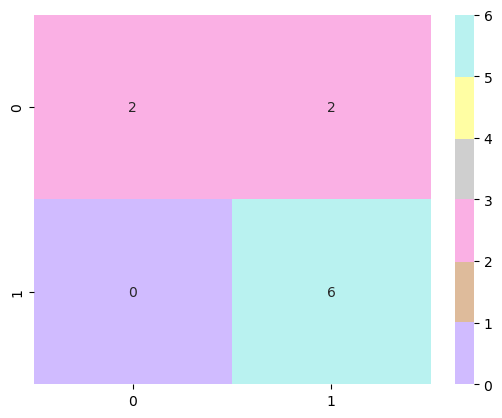

In [70]:
conf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(conf_matrix, cmap= colors, center= 1,  annot=True);

### Q9. Given the following 10 comments related to prostate cancer and their corresponding labels (1 = Has Cancer, 0 = No Cancer), use the Naive Bayes algorithm to build a classifier. Then, apply the trained model to predict whether the new comment, "The doctor noticed some abnormalities in my tests, and I'm worried it could be prostate cancer," indicates that the patient has prostate cancer (class = 1) or not (class = 0). Provide the prediction result (Is the new comment associated with class=1 or class=0)? 

In [73]:
# Download NLTK data
nltk.download('punkt')  
nltk.download('stopwords') 
stemmer= PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shraddhasaraf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shraddhasaraf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Assumption: Here we are going with an assumption the patients who are recommended more tests or are diagnosed with high prostate volume or PSA level are more likely to have prostate cancer

In [76]:
# Mapping the data as per the above assumption.

data = [
    ("My doctor told me the biopsy confirmed it is prostate cancer.", 1),
    ("I've been experiencing symptoms like frequent urination and pain in my lower back, and I'm worried it could be cancer.", 0),
	("The PSA levels came back high, and my doctor recommended further testing.", 1),
	("I feel completely fine, but my family history of cancer makes me nervous.", 0),
	("After the scan, they said there’s no sign of cancer, which was a huge relief.", 0),
	("I started treatment for prostate cancer last month, and it's been a difficult journey.", 1),
    ("The doctor mentioned that my prostate volume was enlarged, which could be a risk factor for cancer.", 1),
	("I’m not sure if my symptoms are cancer-related or just due to aging.", 0),
    ("The specialist said it’s best to do another round of testing to be sure whether it’s cancer or not.", 1),
	("I received the all-clear after my checkup, and they confirmed no signs of cancer.",  0)
]

In [78]:
def preprocess(sentence):
    words = word_tokenize(sentence.lower())
    cleaned_tokens = [re.sub(r'[^\w\s]', '', word) for word in words if re.sub(r'[^\w\s]', '', word)] #remove punctuations using regex
    return {stemmer.stem(word): True for word in cleaned_tokens if word not in stop_words} #remove stop words and maintain the stem word

In [80]:
train_data = [(preprocess(comments), label) for comments, label in data]
classifier = NaiveBayesClassifier.train(train_data)
def predict(comments):
    processed_comment = preprocess(comments)
    return classifier.classify(processed_comment)

new_comment = "The doctor noticed some abnormalities in my tests, and I'm worried it could be prostate cancer."
predicted_label = predict(new_comment)

print(f"The feedback '{new_comment}' is classified as '{predicted_label}'")

The feedback 'The doctor noticed some abnormalities in my tests, and I'm worried it could be prostate cancer.' is classified as '1'


In [84]:
#Here the machine has been trained and the result it classifies based on this new comment is 1
# which means the person is more likely to have prostate cancer